In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [14]:
song_data = pd.read_csv("topsongs.csv", encoding='ISO-8859-1')
song_data=song_data.drop(['Unnamed: 0','pop','artist','top genre','bpm'], axis = 1) 

In [16]:
song_data.tail()

,title,year,nrgy,dnce,dB,live,val,dur,acous,spch
567,Supplies,2018,55,79,-7,13,23,226,1,5
568,Boom Boom,2018,76,75,-8,20,58,248,0,5
569,...Ready For It? - BloodPop® Remix,2018,84,58,-5,10,50,190,13,22
570,Drip (feat. Migos),2018,59,97,-8,8,27,264,5,26
571,Tell Me You Love Me - NOTD Remix,2018,77,58,-5,9,76,182,5,8


In [5]:
song_data.rename(columns = {'bpm':'bits_per_min'
                            , 'nrgy':'energy','dnce':'danceability', 'dB':'loudness(dB)', 'live':'liveness', 'val':'valence',
                            'dur':'duration', 'acous':'acousticness', 'spch':'speechiness'}, inplace=True)

In [6]:
song_data.head()

,title,year,energy,danceability,loudness(dB),liveness,valence,duration,acousticness,speechiness
0,"Hey, Soul Sister",2010,89,67,-4,8,80,217,19,4
1,Love The Way You Lie,2010,93,75,-5,52,64,263,24,23
2,TiK ToK,2010,84,76,-3,29,71,200,10,14
3,Bad Romance,2010,92,70,-4,8,71,295,0,4
4,Just the Way You Are,2010,84,64,-5,9,43,221,2,4


Text(0.5, 1.0, 'speechiness')

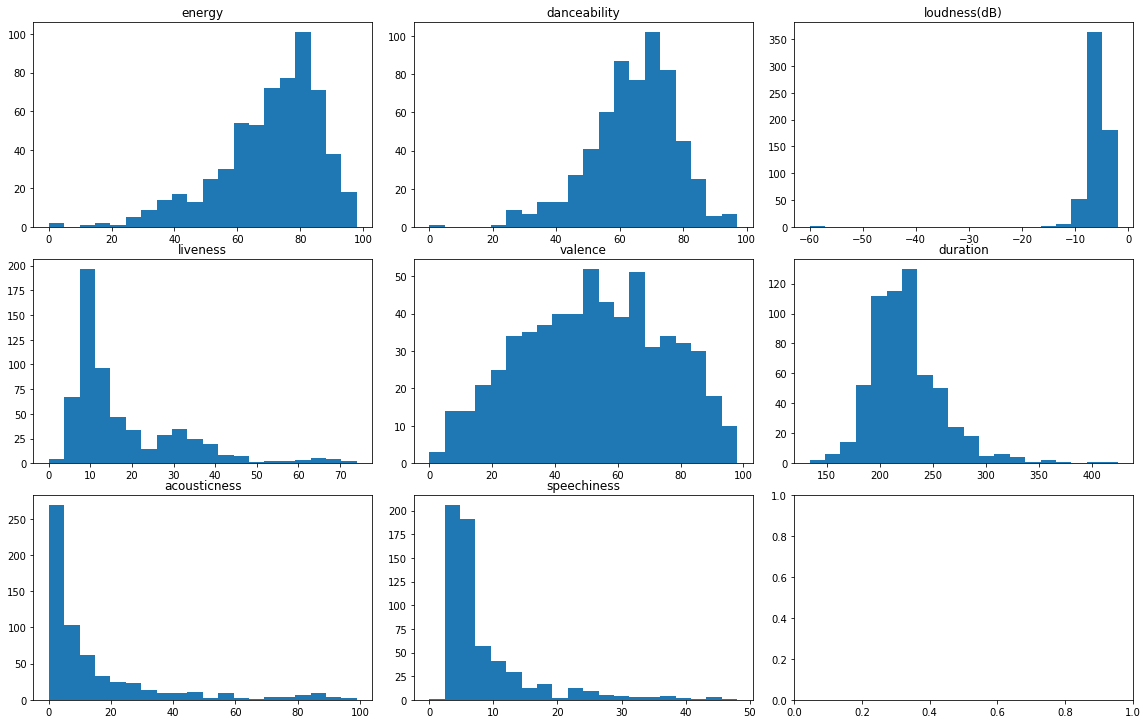

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,10))
plt.tight_layout()
axes[0][0].hist(song_data["energy"],bins=20)
axes[0][0].set_title("energy")
axes[0][1].hist(song_data["danceability"],bins=20)
axes[0][1].set_title("danceability")
axes[0][2].hist(song_data["loudness(dB)"],bins=20)
axes[0][2].set_title("loudness(dB)")
axes[1][0].hist(song_data["liveness"],bins=20)
axes[1][0].set_title("liveness")
axes[1][1].hist(song_data["valence"],bins=20)
axes[1][1].set_title("valence")
axes[1][2].hist(song_data["duration"],bins=20)
axes[1][2].set_title("duration")
axes[2][0].hist(song_data["acousticness"],bins=20)
axes[2][0].set_title("acousticness")
axes[2][1].hist(song_data["speechiness"],bins=20)
axes[2][1].set_title("speechiness")

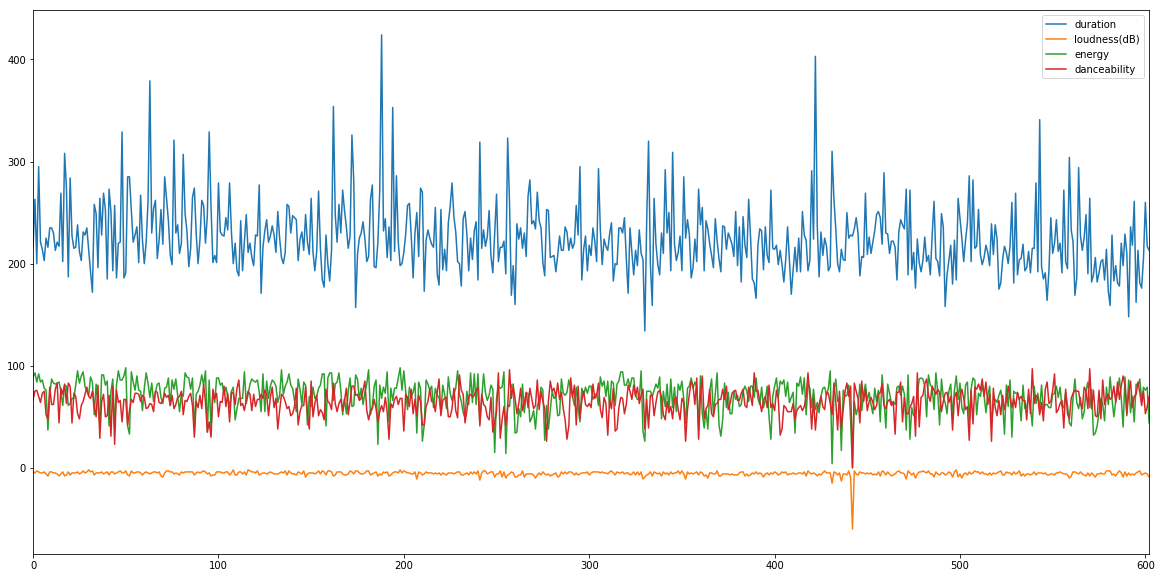

In [377]:
song_data[['duration','loudness(dB)','energy','danceability']].plot(figsize=(20,10))

In [12]:
song_data['target']=1
song_data['speechiness']=song_data['speechiness']/100
song_data['acousticness']=song_data['acousticness']/100
song_data['energy']=song_data['energy']/100
song_data['danceability']=song_data['danceability']/100
song_data['liveness']=song_data['liveness']/100
song_data['valence']=song_data['valence']/100


In [379]:
song_data.head()

,title,energy,danceability,loudness(dB),liveness,valence,duration,acousticness,speechiness,target
0,"Hey, Soul Sister",0.89,0.67,-4,0.08,0.80,217,0.19,0.04,1
1,Love The Way You Lie,0.93,0.75,-5,0.52,0.64,263,0.24,0.23,1
2,TiK ToK,0.84,0.76,-3,0.29,0.71,200,0.10,0.14,1
3,Bad Romance,0.92,0.70,-4,0.08,0.71,295,0.00,0.04,1
4,Just the Way You Are,0.84,0.64,-5,0.09,0.43,221,0.02,0.04,1


In [444]:
ds=pd.read_csv('song_data.csv').drop(['time_signature','tempo','song_popularity','audio_mode','key','instrumentalness'],axis=1)
ds['song_duration_ms']=ds['song_duration_ms']//1000

In [445]:
ds = ds.sample(frac=0.7)
ds['target']=0

In [446]:
ds.head()
ds.rename(columns = {'song_name':'title','loudness':'loudness(dB)', 'audio_valence':'valence',
                     'song_duration_ms':'duration'}, inplace=True)

In [447]:
ds = ds[['title', 'energy','danceability','loudness(dB)','liveness','valence','duration','acousticness','speechiness','target']]

In [448]:
testingds=pd.concat([ds,song_data], axis=0).sample(frac=1)

In [449]:
testingds.head()

,title,energy,danceability,loudness(dB),liveness,valence,duration,acousticness,speechiness,target
276,FourFiveSeconds,0.270,0.580,-6.000,0.1300,0.350,188,0.8800,0.050,1
14460,Immigrant,0.837,0.671,-4.828,0.2560,0.686,232,0.5630,0.436,0
9064,FALL BACK,0.706,0.828,-7.642,0.1420,0.359,165,0.0847,0.195,0
17259,Hard Knock Life (Ghetto Anthem),0.659,0.883,-6.017,0.0285,0.557,238,0.0814,0.294,0
12530,No More,0.848,0.610,-5.116,0.3440,0.666,203,0.0704,0.070,0


In [450]:
testingds['target'].value_counts()

0    13184
1      603
Name: target, dtype: int64

In [451]:
testingds = testingds.reset_index(drop=True)
testingds
testingds.to_csv(r'datadone.csv', index = False)

In [452]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import train_test_split
from sklearn import metrics

In [453]:
y = testingds.target.values

In [454]:
x_data = testingds.drop(['title','target'], axis = 1)  

In [455]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [456]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.1,random_state=1)
print(len(x_train))
print(len(x_test))

12408
1379


In [457]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Test Accuracy {:.2f}%".format(lr.score(x_test,y_test)*100))

Test Accuracy 96.45%


C:\Users\khameesiyadjamoos\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [458]:
from sklearn.svm import SVC

In [459]:
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [460]:
print("SVM : {:.2f}%".format(svm.score(x_test,y_test)*100))

SVM : 96.45%


In [461]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Naive Bayes: {:.2f}%".format(nb.score(x_test,y_test)*100))

Naive Bayes: 96.45%


In [462]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("Decision Tree {:.2f}%".format(dtc.score(x_test, y_test)*100))

Decision Tree 99.20%


In [463]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =1000, random_state = 1)
rf.fit(x_train, y_train)
print("Random Forest  : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest  : 99.13%
